In [1]:
%matplotlib inline

import gym
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output



Using TensorFlow backend.


In [2]:
# Deep Q-learning Agent
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95    # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()
        
    def _build_model(self):
        # Neural Net for Deep-Q learning Model
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(lr=self.learning_rate))
        return model
    
    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
        
    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])  # returns action
    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
              target = reward + self.gamma * np.amax(self.model.predict(next_state)[0])
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

In [3]:
# Logging


data_score = []
data_loss = []

In [4]:
# initialize gym environment and the agent
env = gym.make('CartPole-v0')
agent = DQNAgent(4, 2)
episodes = 1000
batch_size = 32

# Iterate the game
for e in range(episodes):

    state = env.reset()
    state = np.reshape(state, [1, 4])
    
    episode_score = 0
  
    for time_t in range(500):
        # env.render()
        
        action = agent.act(state)

        next_state, reward, done, _ = env.step(action)
        next_state = np.reshape(next_state, [1, 4])
        
        episode_score += reward

        agent.remember(state, action, reward, next_state, done)

        state = next_state

        if done:
            data_score.append(episode_score)

            # print the score and break out of the loop
            clear_output(wait=True)
            print("episode: {}/{}, score: {}".format(e, episodes, time_t))
            break
            
    # train the agent with the experience of the episode
    if len(agent.memory) > batch_size:
        agent.replay(batch_size)

episode: 999/1000, score: 113


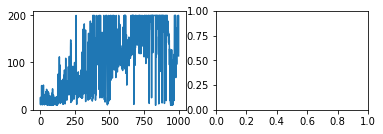

In [5]:
fig = plt.figure()
plot_score = fig.add_subplot(221)
plot_loss = fig.add_subplot(222)
plot_score.plot(data_score)